In [17]:
import pandas as pd
from localutils.dockerscanhelper import DockerImageScanner

images = [
    "nginx:1.16",
    "ubuntu:22.04",
    "alpine:3.15",
    "postgres:10",
    "mysql:8.0",
    "python:3.10",
    "node:18",
    "ruby:3.0",
    "php:8.0",
    "tomcat:9",
    "redis:6",
    "mariadb:10",
    "jenkins:latest-jdk17"
    "elasticsearch:8.15.0",
    "memcached:1.6.33",
    "openjdk:24-ea-17-jdk-bullseye",
    "bitnami/mysql:8.0",
]

df = pd.DataFrame(images, columns=["image"])
df.to_csv("output/images.csv", index=False)

In [2]:
scanner = DockerImageScanner()


2025-03-09 10:37:27,021 - pygrype.logging - INFO - Using Grype 0.89.0


2025-03-09 10:37:27,021 - INFO - Using Grype 0.89.0
2025-03-09 10:37:27,047 - INFO - Initialized DockerRegistryScanner with registry URL: None


In [46]:
dfs = []
images = pd.read_csv("output/images.csv")
dfs = [scanner.scan_image_with_grype(image) for image in images["image"]]
valid_dfs = [d for d in dfs if isinstance(d, pd.DataFrame)]
results = pd.concat(valid_dfs)


2025-03-09 21:42:15,916 - INFO - Scanning image with Grype: nginx:1.16 ...


2025-03-09 21:42:15,917 - pygrype.logging - DEBUG - Running: ['nginx:1.16', '--output', 'json']


2025-03-09 21:42:15,917 - DEBUG - Running: ['nginx:1.16', '--output', 'json']
2025-03-09 21:42:18,808 - INFO - Grype scan results: image: nginx:1.16, found: 455 vulnerabilities
2025-03-09 21:42:18,809 - INFO - Parsing Grype scan results ...
2025-03-09 21:42:18,811 - INFO - Scanning image with Grype: ubuntu:22.04 ...


2025-03-09 21:42:18,811 - pygrype.logging - DEBUG - Running: ['ubuntu:22.04', '--output', 'json']


2025-03-09 21:42:18,811 - DEBUG - Running: ['ubuntu:22.04', '--output', 'json']
2025-03-09 21:42:20,755 - INFO - Grype scan results: image: ubuntu:22.04, found: 60 vulnerabilities
2025-03-09 21:42:20,756 - INFO - Parsing Grype scan results ...
2025-03-09 21:42:20,757 - INFO - Scanning image with Grype: alpine:3.15 ...


2025-03-09 21:42:20,757 - pygrype.logging - DEBUG - Running: ['alpine:3.15', '--output', 'json']


2025-03-09 21:42:20,757 - DEBUG - Running: ['alpine:3.15', '--output', 'json']
2025-03-09 21:42:21,501 - INFO - Grype scan results: image: alpine:3.15, found: 14 vulnerabilities
2025-03-09 21:42:21,501 - INFO - Parsing Grype scan results ...
2025-03-09 21:42:21,502 - INFO - Scanning image with Grype: postgres:10 ...


2025-03-09 21:42:21,503 - pygrype.logging - DEBUG - Running: ['postgres:10', '--output', 'json']


2025-03-09 21:42:21,503 - DEBUG - Running: ['postgres:10', '--output', 'json']


KeyboardInterrupt: 

In [ ]:
images

In [27]:
df.to_csv("output/scan_results-20250309.csv", index=False)

In [39]:
df.columns

Index(['Image_Name', 'Vulnerability_ID', 'DataSource', 'Package_Name',
       'Package_Version', 'Package_URL', 'Fixed_Version', 'Severity',
       'Description'],
      dtype='object')

Text(0.5, 1.0, 'Vulnerability Severity Counts')

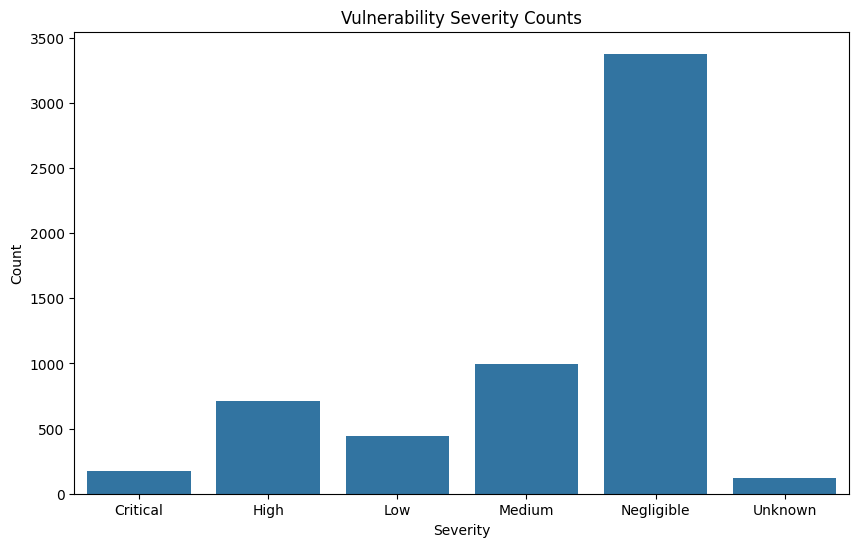

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

# add labels to each bar

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.title("Vulnerability Severity Counts")



In [32]:
# median vulnerability count by severity
df.groupby("Severity").count()

,Image_Name,Vulnerability_ID,DataSource,Package_Name,Package_Version,Package_URL,Fixed_Version,Description
Severity,,,,,,,,
Critical,176,176,176,176,176,176,176,176
High,709,709,709,709,709,709,709,703
Low,441,441,441,441,441,441,441,306
Medium,999,999,999,999,999,999,999,836
Negligible,3376,3376,3376,3376,3376,3376,3376,3355
Unknown,123,123,123,123,123,123,123,81


In [ ]:
matrix = pd.read_csv("output/cves_epss_kevs_cwe_enriched-2025-03-06.csv")




/var/folders/7z/yz2432ws1sn3rvp0tf40s2d00000gp/T/ipykernel_20886/1875786389.py:1: DtypeWarning: Columns (4,15,17,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  matrix = pd.read_csv("output/cves_epss_kevs_cwe_enriched-2025-03-06.csv")


In [37]:
enriched_results = pd.merge(df, matrix, left_on="Vulnerability_ID", right_on="cve_id", how="left")

In [38]:
enriched_results.columns

Index(['Image_Name', 'Vulnerability_ID', 'DataSource', 'Package_Name',
       'Package_Version', 'Package_URL', 'Fixed_Version', 'Severity',
       'Description', 'cve_id', 'description', 'published_date',
       'last_modified_date', 'cvss_version', 'cwe_id', 'cwe_name', 'cwe_desc',
       'cwe_cc_scope', 'cwe_cc_impact', 'cvss_vector', 'attack_vector',
       'attack_complexity', 'privileges_required', 'user_interaction',
       'base_score', 'base_severity', 'exploitability_score',
       'confidentiality_impact', 'integrity_impact', 'availability_impact',
       'cve_exploitable', 'cve_automatable', 'cve_tech_impact', 'epss',
       'percentile', 'kev_vendor_proj', 'kev_product', 'kev_vuln_name',
       'kev_date_added', 'kev_desc', 'kev_req_action', 'kev_due_date',
       'kev_known_ransom_camp_use', 'notes', 'kev_cwes'],
      dtype='object')

In [ ]:
# make all colunm name lowercase
enriched_results.columns = enriched_results.columns.str.lower()
enriched_results = enriched_results.rename(columns={"datasource": "data_source"})
enriched_results = enriched_results.drop(columns=["cve_id", "description"])
# fill all NaN values with "not_found"
enriched_results = enriched_results.fillna("not_found")